In [170]:
data = 'Master Exam Data.txt'

In [171]:
#replaces all spaces with tabs
import fileinput

with fileinput.FileInput(data, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace('\t', ' ').replace(',', '.'), end='')

In [172]:
import pandas as pd

table = pd.read_table(data, sep=' ', header=0, encoding='utf-8')

In [173]:
teacherData = { 'Лісецький': table[table.teacher == 'Лісецький'], 'Свірепчук': table[table.teacher == 'Свірепчук']}
teacher1, teacher2 = 'Лісецький' ,'Свірепчук'

print(teacherData[teacher2])
print(len(teacherData[teacher2]))
print(teacherData[teacher2]['markA'].value_counts()[0]/len(teacherData[teacher2]))

      student  points markA  mark5    teacher
0   Блаватний      81     С    4.0  Свірепчук
3     Єлісєєв      96     А    5.0  Свірепчук
4      Івашин      93     В    4.5  Свірепчук
5     Кулешов      97     А    5.0  Свірепчук
6    Макарчук      91     В    4.5  Свірепчук
8   Остапенко      96     А    5.0  Свірепчук
10    Пікущий      94     В    4.5  Свірепчук
14   Семенчук      98     А    5.0  Свірепчук
15     Ткачук      96     А    5.0  Свірепчук
16     Усенко      95     А    5.0  Свірепчук
17  Хомицький      92     В    4.5  Свірепчук
19       Цопа      96     А    5.0  Свірепчук
20   Чалієнко      83     С    4.0  Свірепчук
21  Чистякова      98     А    5.0  Свірепчук
22   Шевченко      95     А    5.0  Свірепчук
15
0.6


In [174]:
result = pd.DataFrame(columns=('Лісецький', 'Свірепчук'))
result.loc['Середній бал'] = [teacherData[teacher1].mean().points, teacherData[teacher2].mean().points]
result.loc['Оцінки'] = [
    dict(teacherData[teacher1]['markA'].value_counts()),
    dict(teacherData[teacher2]['markA'].value_counts())
]
result.loc['Найвищий бал'] = [teacherData[teacher1].max().points, teacherData[teacher2].max().points]
result.loc['Найнижчий бал'] = [teacherData[teacher1].min().points, teacherData[teacher2].min().points]




In [175]:
result

,Лісецький,Свірепчук
Середній бал,94.5556,93.4
Оцінки,"{'А': 6, 'В': 3}","{'А': 9, 'С': 2, 'В': 4}"
Найвищий бал,99,98
Найнижчий бал,85,81


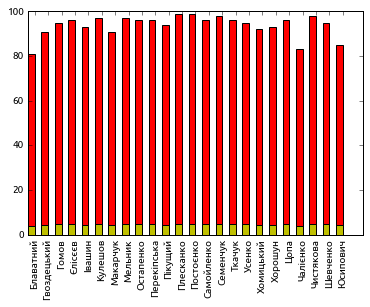

In [176]:
from __future__ import unicode_literals
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'fantasy'
plt.rcParams['font.fantasy'] = 'Times New Roman', 'Ubuntu','Arial','Tahoma','Calibri'

%matplotlib inline
import numpy as np

ind = np.arange(len(table))
width = 0.5
fig, ax = plt.subplots()

rects1 = ax.bar(ind, table['points'], width, color='r')
rects2 = ax.bar(ind, table['mark5'], width, color='y')

ax.set_xticks(ind + width)
ax.set_xticklabels(table['student'], rotation='90')

plt.show()

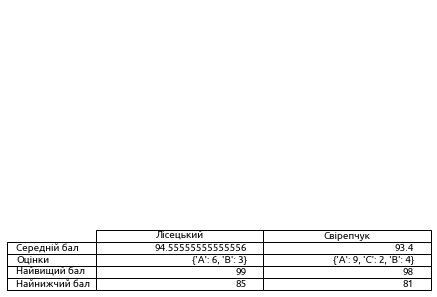

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, result)  
plt.savefig('mytable.png')